# Breast Cancer Diagnostic datasets.

**Missing Attribute Values:**
None

**Class Distribution:**
212 - Malignant, 357 - Benign

**Creator:**
Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

**Donor:**
Nick Street

**Date:**
November, 1995


This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, “Decision Tree Construction Via Linear Programming.” Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: “Robust Linear Programming Discrimination of Two Linearly Inseparable Sets”, Optimization Methods and Software 1, 1992, 23-34].

Paper: [Nuclear Feature Extraction for Breast Tumor Diagnosis ](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=5B5FD6DA1A0682FA1DC16226753AD866?sequence=1)

## Install

In [1]:
!pip install ydata-profiling
!pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


## Import

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Carga y Preparación de Datos

In [3]:
cancer = load_breast_cancer()

data = cancer.data
labels = cancer.target

feature_names = cancer.feature_names
target_names = cancer.target_names

In [4]:
print(f"Número de muestras: {data.shape[0]}, Número de características: {data.shape[1]}")

Número de muestras: 569, Número de características: 30


In [5]:
len(data[0])

30

In [6]:
target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
y = pd.DataFrame(data=labels, columns=["labels"]).replace({0:"malignant", 1:"benign"})
y.head()

,labels
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant


In [8]:
y.value_counts(normalize=True)

,proportion
labels,
benign,0.627417
malignant,0.372583


In [9]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
X = pd.DataFrame(data=data, columns=feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
profile_report = ProfileReport(X, title="Breast Cancer Data Profiling Report")
profile_report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Normalización (Paso crucial para PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

In [13]:
X_std_df = pd.DataFrame(data=X_std, columns=feature_names)
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
profile_report = ProfileReport(X_std_df, title="Breast Cancer Data Profiling Report")
profile_report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

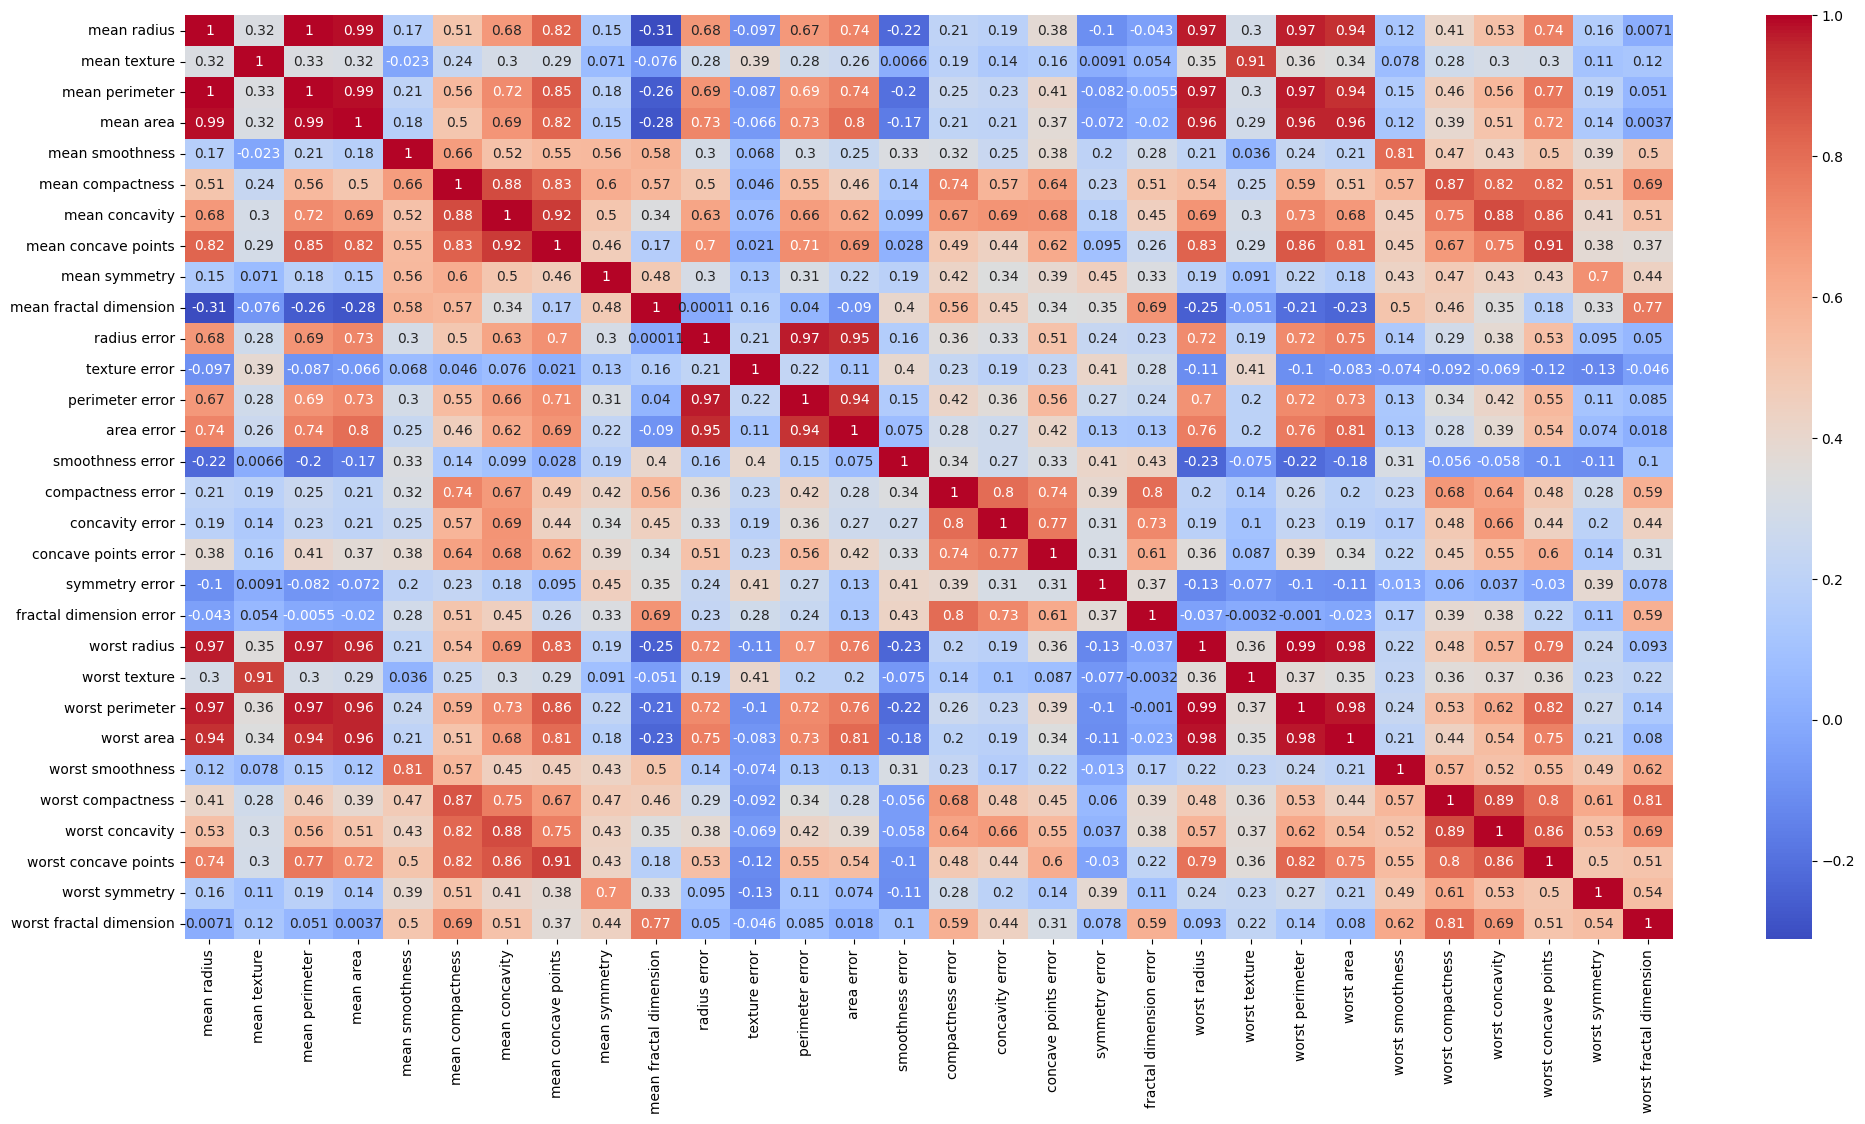

In [15]:
plt.figure(figsize=(24, 12))
sns.heatmap(X_std_df.corr(), annot=True, cmap="coolwarm")
plt.show()

## PCA "A Mano" (El Motor Detrás de la Magia)

Entendiendo el PCA 'a mano'

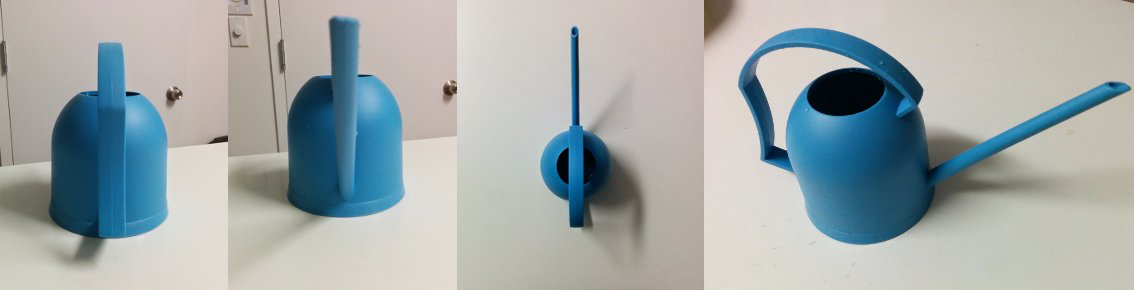

Como analogía (Hackeling, 2017):

- En la primera fotografía se ve la parte trasera de la regadera, pero no se ve la delantera.

- La segunda fotografía está en ángulo para mirar directamente por el pico de la regadera; esta fotografía proporciona información sobre la parte delantera que no se veía en la primera, pero ahora no se ve el asa.

- La altura de la regadera no se aprecia desde la vista aérea de la tercera fotografía.

- La cuarta fotografía es la opción obvia para el catálogo; en ella se aprecian la altura, la parte superior, el pico y el asa de la regadera.

La ortogonalidad en PCA (Análisis de Componentes Principales) significa que los componentes principales (CP1, CP2, CP3, etc.) no están correlacionados entre sí. Geométricamente, puedes imaginarlos como ejes (vectores) que son perpendiculares (a 90 grados) unos de otros en el espacio de alta dimensión.

![Ortogonalidad](https://upload.wikimedia.org/wikipedia/commons/2/2c/3D_coordinate_system.svg)

El propósito de esta propiedad es asegurar que cada nuevo componente principal capture una fuente de varianza única que no fue capturada por los componentes anteriores.

- CP1 captura la máxima varianza posible.

- CP2 captura la máxima varianza restante, bajo la condición de ser ortogonal (no correlacionado) a CP1.

- CP3 captura la máxima varianza restante, bajo la condición de ser ortogonal a CP1 y CP2.

- ...y así sucesivamente.

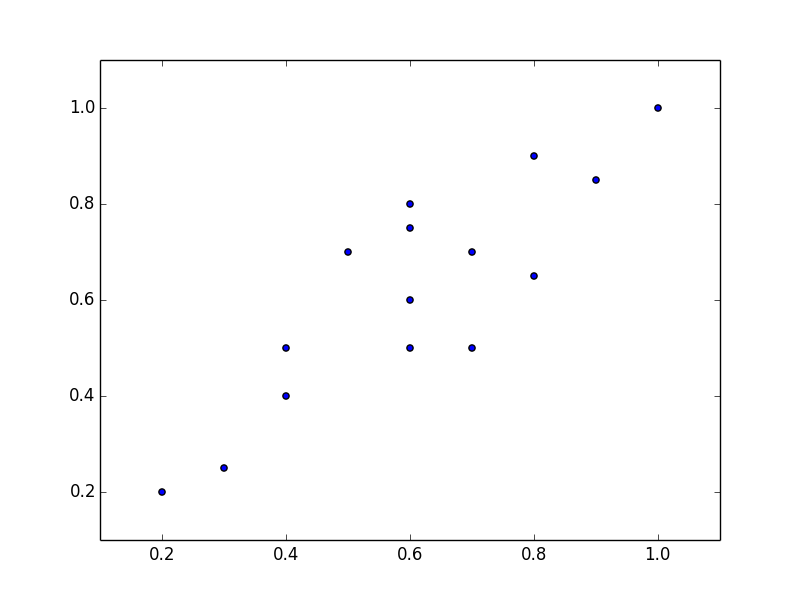

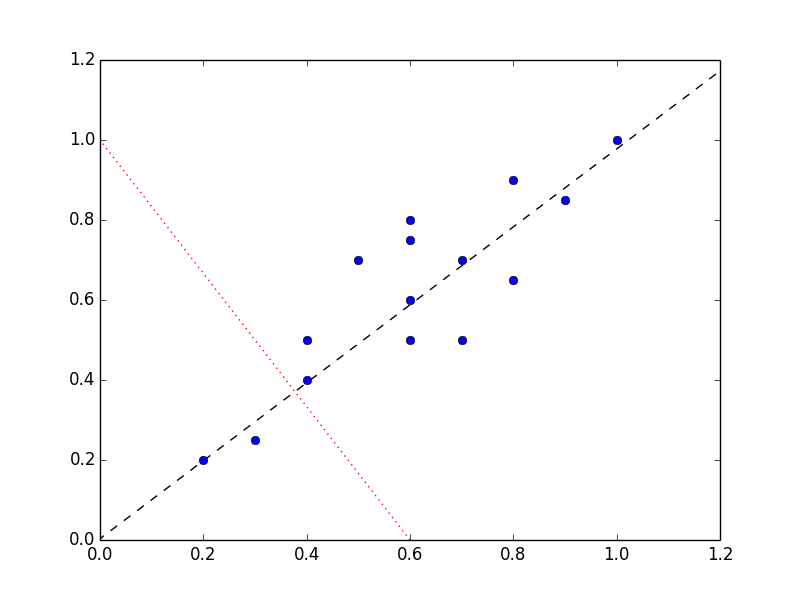

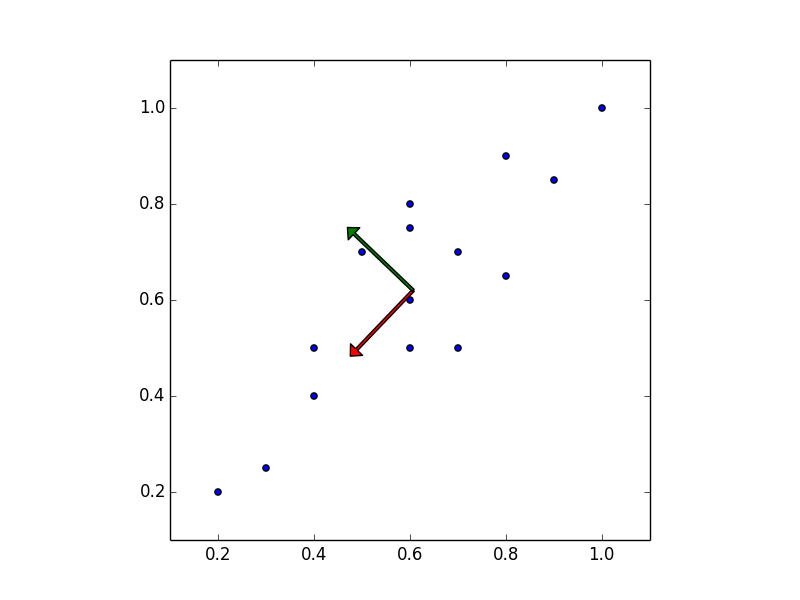

Podríamos inferir que, en Geometría: Dos vectores son ortogonales ($90^\circ$) si su "producto escalar" (dot product) es cero. Esta es la prueba matemática.

En Estadística y PCA: No podemos "ver" un ángulo de $90^\circ$ entre dos variables en un espacio de 50 dimensiones. Pero sí podemos usar la misma prueba matemática.

En este contexto, el "producto escalar" es análogo a la correlación (o covarianza).Cuando decimos que dos componentes principales (CP1 y CP2) son ortogonales, queremos decir que su correlación es cero.

### tip:

**Geometría:** Ortogonal = Perpendicular ($90^\circ$)

**Estadística:** Ortogonal = No Correlacionado ($0$ correlación)

In [16]:
# Calculamos la matriz de covarianza
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix.shape

(30, 30)

In [17]:
cov_matrix[0]

array([ 1.00176056,  0.32435193,  0.99961207,  0.98909547,  0.17088151,
        0.50701464,  0.67795504,  0.82397664,  0.14800135, -0.31217947,
        0.68028597, -0.09748878,  0.67535854,  0.7371592 , -0.22299203,
        0.20636266,  0.19454553,  0.37683123, -0.10450454, -0.04271634,
        0.97124591,  0.29753054,  0.9668357 ,  0.94273929,  0.11982673,
        0.41419075,  0.52783912,  0.74552443,  0.16424199,  0.00707833])

In [18]:
# Calculamos los valores y vectores propios (Eigenvalues y Eigenvectors)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [19]:
# Vectores propios o componentes principales
eigen_vectors.shape
eigen_vectors[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613,  0.05111877,
       -0.15058388,  0.20292425,  0.14671234, -0.22538466, -0.70241409,
        0.21146046, -0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])

In [20]:
# Validación de ortogonalidad - producto punto
round(np.dot(eigen_vectors[0], eigen_vectors[1]), 10)

np.float64(-0.0)

In [21]:
# Validación de ortogonalidad - correlación de componentes principales
np.corrcoef(eigen_vectors[0], eigen_vectors[1], rowvar=False)

array([[ 1.        , -0.02631695],
       [-0.02631695,  1.        ]])

In [22]:
# Valores propios o varianza explicada
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

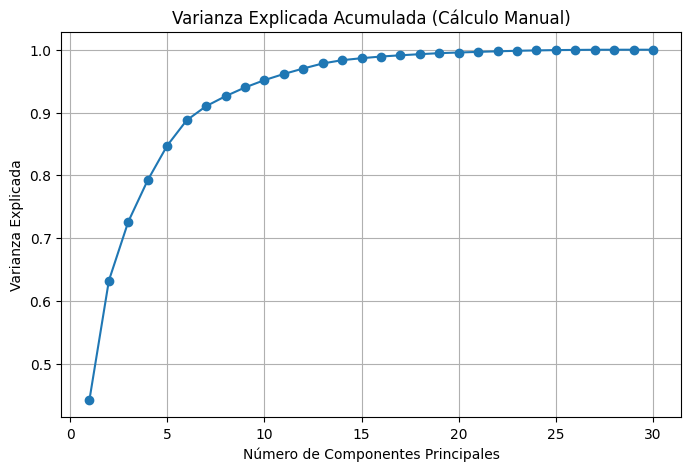

In [23]:
# Graficamos la varianza explicada por cada componente (Scree Plot manual)

total_eigen_values = sum(eigen_values)
explained_variance_ratio_manual = [(i / total_eigen_values) for i in sorted(eigen_values, reverse=True)]
explained_variance_acum_manual = np.cumsum(explained_variance_ratio_manual)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_acum_manual) + 1), explained_variance_acum_manual, '-o', label='Varianza Acumulada (Manual)')
plt.title('Varianza Explicada Acumulada (Cálculo Manual)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.grid(True)
plt.show()

### PCA con Scikit-learn (La Herramienta Práctica)

Aplicando PCA con Scikit-learn

In [24]:
# Ajustamos PCA una vez con todos los componentes para analizar
pca = PCA(n_components=None)
Z_pca = pca.fit_transform(X_std)

In [25]:
# La varianza explicada por sklearn es idéntica a la manual
explained_variance_acum = np.cumsum(pca.explained_variance_ratio_)

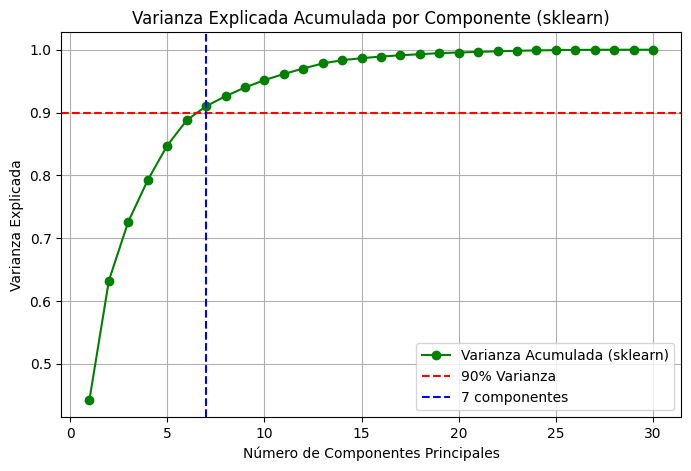

In [26]:
# Graficar la Varianza Explicada (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_acum) + 1), explained_variance_acum, '-o', label='Varianza Acumulada (sklearn)', color='green')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Varianza')
plt.axvline(x=7, color='b', linestyle='--', label='7 componentes')
plt.title('Varianza Explicada Acumulada por Componente (sklearn)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Encontrar cuántos componentes para 90% de varianza
n_components_90 = np.where(explained_variance_acum >= 0.90)[0][0] + 1
print(f"Se necesitan {n_components_90} componentes para explicar el 90% de la varianza.")

Se necesitan 7 componentes para explicar el 90% de la varianza.


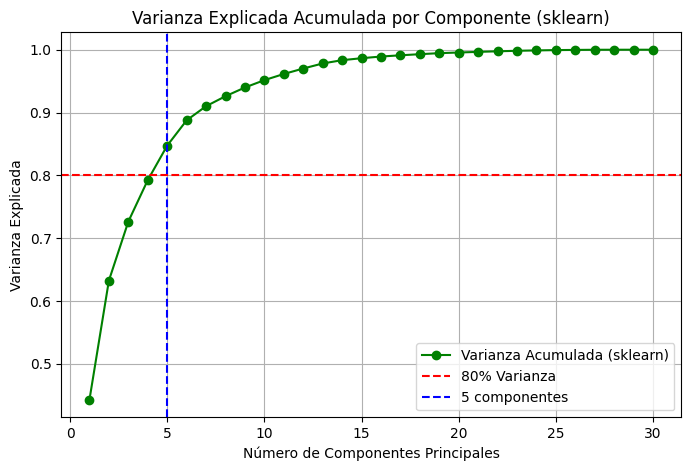

In [28]:
# Graficar la Varianza Explicada (Scree Plot) - revisemos Pareto ahora.
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_acum) + 1), explained_variance_acum, '-o', label='Varianza Acumulada (sklearn)', color='green')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza')
plt.axvline(x=5, color='b', linestyle='--', label='5 componentes')
plt.title('Varianza Explicada Acumulada por Componente (sklearn)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Encontrar cuántos componentes para 90% de varianza
n_components_80 = np.where(explained_variance_acum >= 0.80)[0][0] + 1
print(f"Se necesitan {n_components_80} componentes para explicar el 80% de la varianza.")

Se necesitan 5 componentes para explicar el 80% de la varianza.


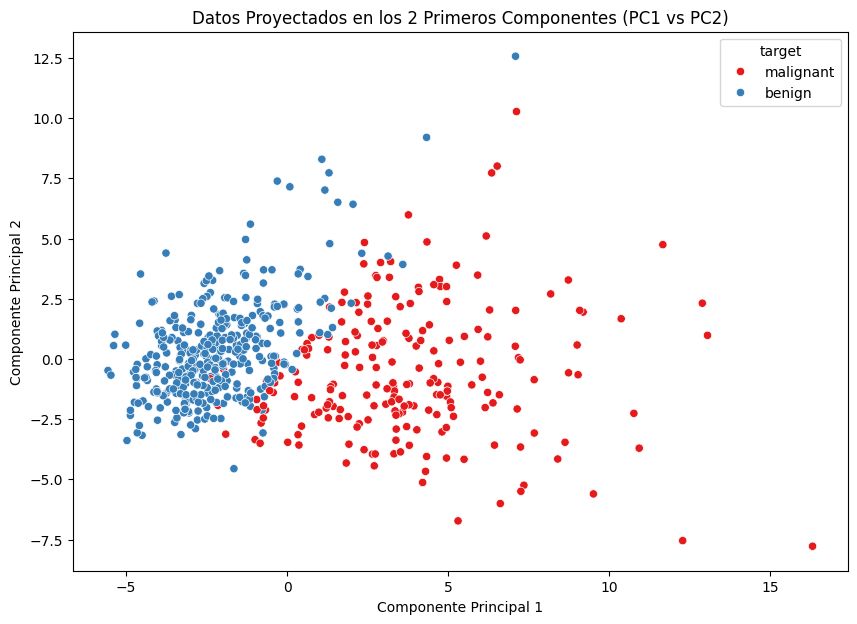

In [30]:
# Visualizar Datos Proyectados (Reducción a 2D)
plt.figure(figsize=(10, 7))
plot_df = pd.DataFrame(data=Z_pca[:, :2], columns=['PC_1', 'PC_2'])
plot_df['target'] = [target_names[l] for l in labels]
sns.scatterplot(x='PC_1', y='PC_2', hue='target', palette=sns.color_palette("Set1", n_colors=2), data=plot_df, legend="full")
plt.title('Datos Proyectados en los 2 Primeros Componentes (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

## Midiendo el impacto del PCA en un modelo de Machine Learning
Aplicación Práctica: Regresión Logística

In [31]:
# Dividimos los datos originales
X_train, X_test, y_train, y_test = train_test_split(X_std, labels, test_size=0.3, random_state=42)

In [32]:
# Modelo 1: Usando las 30 características originales
print("\nEntrenando Modelo 1 (con todas las características)...")
model_full = LogisticRegression()
model_full.fit(X_train, y_train)
predictions_full = model_full.predict(X_test)
accuracy_full = accuracy_score(y_test, predictions_full)
print(f"Precisión con las 30 características originales: {accuracy_full:.4f}")


Entrenando Modelo 1 (con todas las características)...
Precisión con las 30 características originales: 0.9825


In [33]:
# Modelo 2: Usando los componentes principales que explican el 90% de la varianza
print(f"\nEntrenando Modelo 2 (con {n_components_80} componentes principales)...")
pca_model = PCA(n_components=n_components_80)


Entrenando Modelo 2 (con 5 componentes principales)...


In [34]:
# ----> Importante: Ajustar el PCA solo con los datos de entrenamiento
X_train_pca = pca_model.fit_transform(X_train)

In [35]:
# Aplicar la misma transformación a los datos de prueba
X_test_pca = pca_model.transform(X_test)

In [36]:
# Entrenamos el modelo
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
predictions_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Precisión con {n_components_80} componentes principales: {accuracy_pca:.4f}")

Precisión con 5 componentes principales: 0.9883


## Análisis y Conclusión

In [37]:
print(f"Redujimos el número de características de {X_std.shape[1]} a solo {n_components_80}.")
print(f"La diferencia en precisión fue de solo {(accuracy_full - accuracy_pca):.4f}. Es decir, menos de 1% entre los modelos.")
print("Esto demuestra que el PCA es una técnica poderosa para reducir la complejidad del modelo con una pérdida mínima de rendimiento.")

Redujimos el número de características de 30 a solo 5.
La diferencia en precisión fue de solo -0.0058. Es decir, menos de 1% entre los modelos.
Esto demuestra que el PCA es una técnica poderosa para reducir la complejidad del modelo con una pérdida mínima de rendimiento.
